In [2]:
import pandas as pd
import numpy as np

In [4]:
arr=np.array([1,2,3])


In [5]:
print(arr)

[1 2 3]


In [6]:
pip install nsetools

Note: you may need to restart the kernel to use updated packages.


In [7]:
from nsetools import Nse

In [8]:
nse=Nse()

In [9]:
print(nse)

Driver Class for National Stock Exchange (NSE)


In [12]:
q=nse.get_quote('KANSAINER')

In [13]:
from pprint import pprint

In [14]:
pprint(q)

{'adhocMargin': None,
 'applicableMargin': 19.3,
 'averagePrice': 645.33,
 'basePrice': 628.65,
 'bcEndDate': None,
 'bcStartDate': None,
 'buyPrice1': 656.15,
 'buyPrice2': None,
 'buyPrice3': None,
 'buyPrice4': None,
 'buyPrice5': None,
 'buyQuantity1': 1830.0,
 'buyQuantity2': None,
 'buyQuantity3': None,
 'buyQuantity4': None,
 'buyQuantity5': None,
 'change': 31.35,
 'closePrice': 656.15,
 'cm_adj_high_dt': '14-JAN-21',
 'cm_adj_low_dt': '24-MAR-20',
 'cm_ffm': 8840.3,
 'companyName': 'Kansai Nerolac Paints Limited',
 'css_status_desc': 'Listed',
 'dayHigh': 672.65,
 'dayLow': 618.0,
 'deliveryQuantity': 304912.0,
 'deliveryToTradedQuantity': 44.14,
 'exDate': '12-NOV-20',
 'extremeLossMargin': 3.5,
 'faceValue': 1.0,
 'high52': 672.65,
 'indexVar': None,
 'isExDateFlag': False,
 'isinCode': 'INE531A01024',
 'lastPrice': 660.0,
 'low52': 293.7,
 'marketType': 'N',
 'ndEndDate': None,
 'ndStartDate': None,
 'open': 630.0,
 'pChange': 4.99,
 'previousClose': 628.65,
 'priceBand': 2

In [15]:
top_gainers = nse.get_top_gainers()

In [16]:
pprint(top_gainers)

[{'highPrice': 515.0,
  'lastCorpAnnouncement': 'Dividend - Rs 6 Per Sh',
  'lastCorpAnnouncementDate': '19-Aug-2020',
  'lowPrice': 493.0,
  'ltp': 509.9,
  'netPrice': 3.7,
  'openPrice': 494.1,
  'previousPrice': 491.7,
  'series': 'EQ',
  'symbol': 'UPL',
  'tradedQuantity': 15231242.0,
  'turnoverInLakhs': 77548.35},
 {'highPrice': 430.0,
  'lastCorpAnnouncement': 'Annual General Meeting',
  'lastCorpAnnouncementDate': '18-Sep-2020',
  'lowPrice': 411.0,
  'ltp': 425.0,
  'netPrice': 3.18,
  'openPrice': 412.0,
  'previousPrice': 411.9,
  'series': 'EQ',
  'symbol': 'BPCL',
  'tradedQuantity': 12600096.0,
  'turnoverInLakhs': 52989.7},
 {'highPrice': 980.7,
  'lastCorpAnnouncement': 'Annual General Meeting/Dividend - Rs 7.50 Per Share',
  'lastCorpAnnouncementDate': '08-Aug-2019',
  'lowPrice': 951.25,
  'ltp': 971.05,
  'netPrice': 3.0,
  'openPrice': 953.0,
  'previousPrice': 942.75,
  'series': 'EQ',
  'symbol': 'INDUSINDBK',
  'tradedQuantity': 14887258.0,
  'turnoverInLakhs':

In [17]:
pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36089 sha256=3afc4aa894e1e794e771523ec5f8fd40c8daf6e99b794695441032b05246f636
  Stored in directory: c:\users\aryan\appdata\local\pip\cache\wheels\32\ab\d9\78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy
Note: you may need to restart the kernel to use updated packages.


In [18]:
from nsepy import get_history

In [19]:
from datetime import date

In [20]:
data = get_history(symbol="SBIN", start=date(2021,1,1), end=date(2021,1,21))

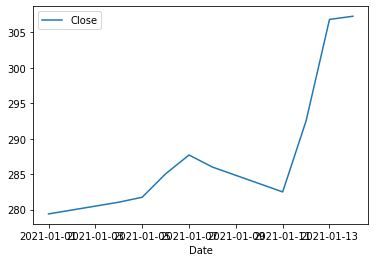

In [21]:
data[['Close']].plot()

In [23]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-01,SBIN,EQ,274.95,274.90,280.00,274.40,279.05,279.40,278.33,24531791,6.827968e+14,141601,4783442,0.1950
2021-01-04,SBIN,EQ,279.40,281.85,283.90,277.75,281.10,281.05,281.41,31450608,8.850464e+14,171760,6521226,0.2073
2021-01-05,SBIN,EQ,281.05,278.05,282.45,277.00,281.40,281.75,279.69,27393072,7.661574e+14,155149,4984903,0.1820
2021-01-06,SBIN,EQ,281.75,283.00,289.15,281.40,283.90,285.05,285.76,40765708,1.164907e+15,224327,6201351,0.1521
2021-01-07,SBIN,EQ,285.05,289.00,291.80,287.00,288.00,287.70,289.15,30546600,8.832502e+14,183684,8560453,0.2802
2021-01-08,SBIN,EQ,287.70,290.10,291.40,285.20,285.90,286.00,288.25,32543357,9.380501e+14,169736,7276745,0.2236
2021-01-11,SBIN,EQ,286.00,288.00,288.20,279.60,282.80,282.50,282.50,29703173,8.391027e+14,209864,8900394,0.2996
2021-01-12,SBIN,EQ,282.50,280.00,293.85,277.90,293.20,292.50,286.89,44307145,1.271142e+15,275857,14782759,0.3336
2021-01-13,SBIN,EQ,292.50,296.00,308.00,294.50,305.95,306.80,301.17,78042133,2.350398e+15,413038,15723571,0.2015


In [24]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [25]:
import dateutil.relativedelta

In [26]:
import matplotlib.pyplot as plt

In [38]:
from datetime import datetime

In [39]:
to_date=datetime.now()

In [53]:
to_date=datetime.strftime(to_date, "%Y %m, %d")

In [54]:
to_date=datetime.strptime(to_date, "%Y %m, %d")

In [70]:
from_date=to_date-dateutil.relativedelta.relativedelta(day=14)

In [65]:
from_date

datetime.datetime(2021, 1, 15, 0, 0)

relativedelta(month=6)


In [69]:
from_date

datetime.datetime(2021, 1, 15, 0, 0)

In [49]:
to_date

datetime.datetime(2021, 1, 15, 0, 0)

In [71]:
data = get_history(symbol="SBIN", start=from_date, end=to_date)

In [72]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-14,SBIN,EQ,306.8,306.7,309.25,303.8,307.7,307.25,307.16,40123498,1.232415e+15,244731,11711561,0.2919


In [41]:
datetime.strptime(to_date, "%Y %m, %d")

TypeError: strptime() argument 1 must be str, not datetime.datetime

In [34]:
to_date

datetime.datetime(2021, 1, 15, 2, 8, 23, 495733)